# Student Depression Prediction with Logistic Regression

## 📌 Project Overview
This project predicts whether a student is at risk of depression based on demographic,  lifestyle,and stress-related features.  
The goal is to build a classification model and evaluate its performance.

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
df=pd.read_csv('student_depression_dataset.csv')
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [ ]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [ ]:
df['Work Pressure'].value_counts()


,count
Work Pressure,
0.0,27898
5.0,2
2.0,1


In [ ]:
df=df[df['Profession']=='Student']

In [ ]:
df=df[df['Work Pressure']==0.0]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
columns_le='Gender','City','Dietary Habits','Degree','Have you ever had suicidal thoughts ?','Family History of Mental Illness'
for col in columns_le:
    df[col]=le.fit_transform(df[col])


In [ ]:
df.shape

(27867, 18)

In [ ]:
df['Sleep Duration'].value_counts()

,count
Sleep Duration,
'Less than 5 hours',8303
'7-8 hours',7335
'5-6 hours',6176
'More than 8 hours',6035
Others,18


In [ ]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,1,33.0,51,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',0,4,1,3.0,1.0,0,1
1,8,0,24.0,5,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',1,11,0,3.0,2.0,1,0
2,26,1,31.0,44,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',0,6,0,9.0,1.0,1,0
3,30,0,28.0,49,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',1,8,1,4.0,5.0,1,1
4,32,0,25.0,18,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',1,17,1,1.0,1.0,0,0


In [ ]:
df.replace(to_replace="'More than 8 hours'", value='8.3', inplace=True)
df.replace(to_replace="'7-8 hours'", value='7.3', inplace=True)
df.replace(to_replace="'5-6 hours'", value='5.3', inplace=True)
df.replace(to_replace="'Less than 5 hours'", value='4.3', inplace=True)
df.replace(to_replace="Others", value='0', inplace=True)
df=df[df['Sleep Duration']!='0']

In [ ]:
id=df['id']
df=df.drop('id', axis=1)

In [ ]:
df['Financial Stress'].value_counts()

,count
Financial Stress,
5.0,6701
4.0,5767
3.0,5213
1.0,5111
2.0,5054
?,3


In [ ]:
df['Financial Stress'].value_counts()
df=df[df['Financial Stress']!='?']

In [ ]:
x=df.drop(['Depression','Profession','Work Pressure','Job Satisfaction'], axis=1)
y=df['Depression']

In [ ]:
x

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,1,33.0,51,5.0,8.97,2.0,5.3,0,4,1,3.0,1.0,0
1,0,24.0,5,2.0,5.90,5.0,5.3,1,11,0,3.0,2.0,1
2,1,31.0,44,3.0,7.03,5.0,4.3,0,6,0,9.0,1.0,1
3,0,28.0,49,3.0,5.59,2.0,7.3,1,8,1,4.0,5.0,1
4,0,25.0,18,4.0,8.13,3.0,5.3,1,17,1,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,0,27.0,45,5.0,5.75,5.0,5.3,3,0,1,7.0,1.0,1
27897,1,27.0,25,2.0,9.40,3.0,4.3,0,25,0,0.0,3.0,1
27898,1,31.0,11,3.0,6.61,4.0,5.3,3,22,0,12.0,2.0,0
27899,0,18.0,25,5.0,6.88,2.0,4.3,0,0,1,10.0,5.0,0


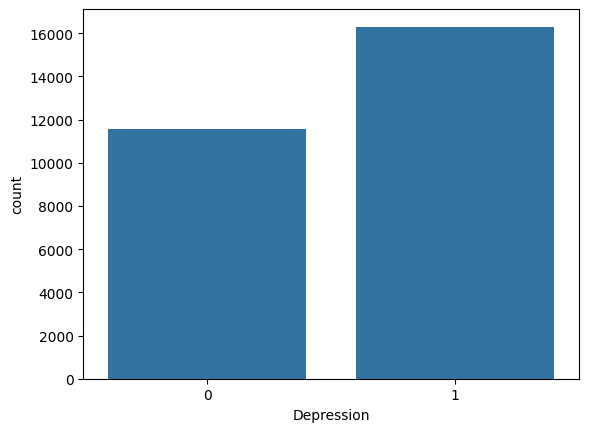

In [ ]:
sns.countplot(x="Depression", data=df)
plt.show()

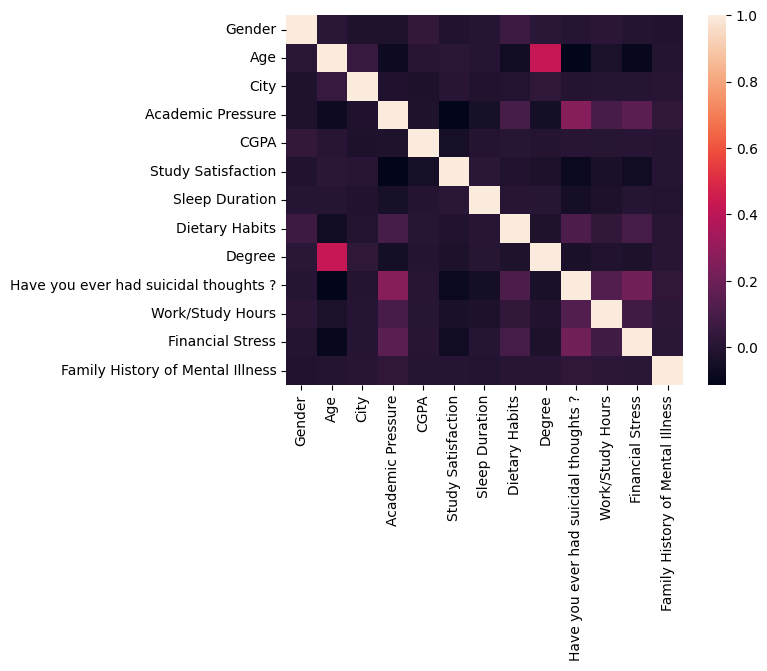

In [ ]:
#EDA
import seaborn as sns
matrix=x.corr()
sns.heatmap(matrix, annot=False)
plt.show()

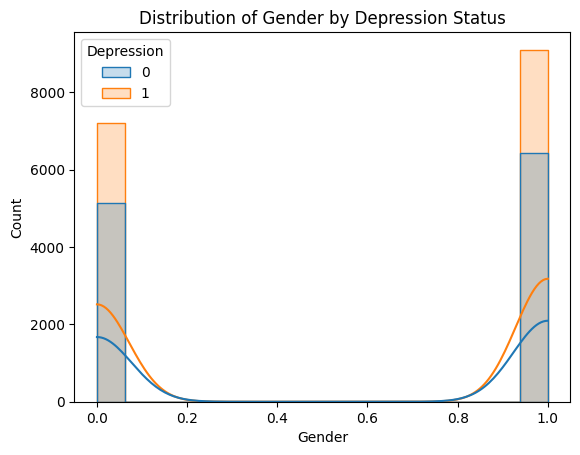

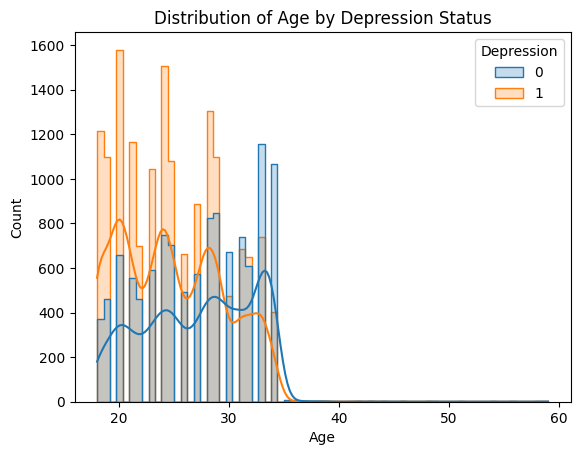

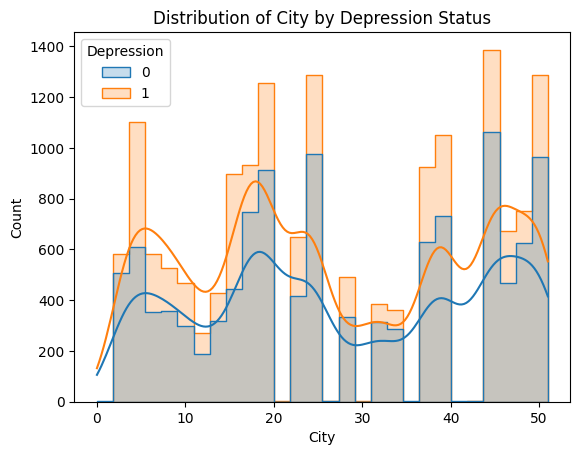

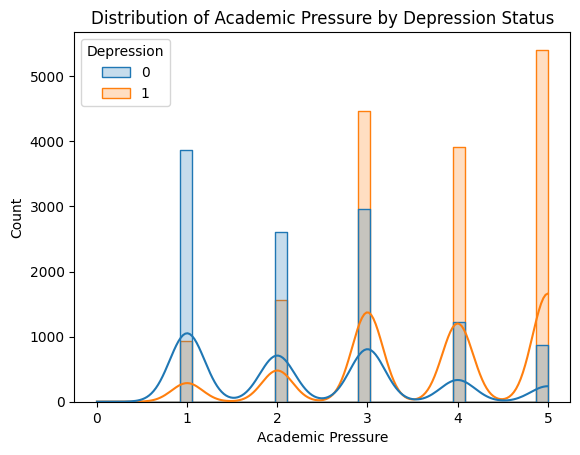

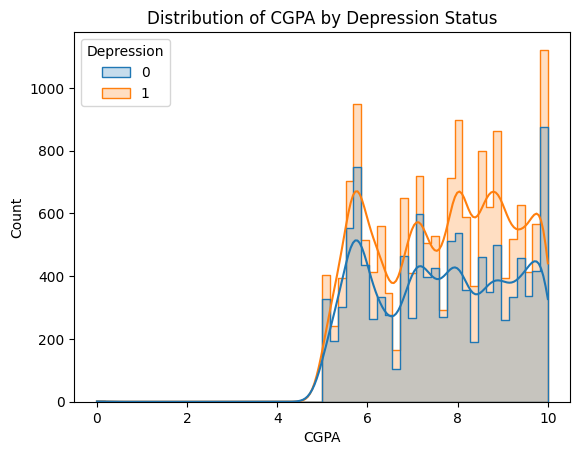

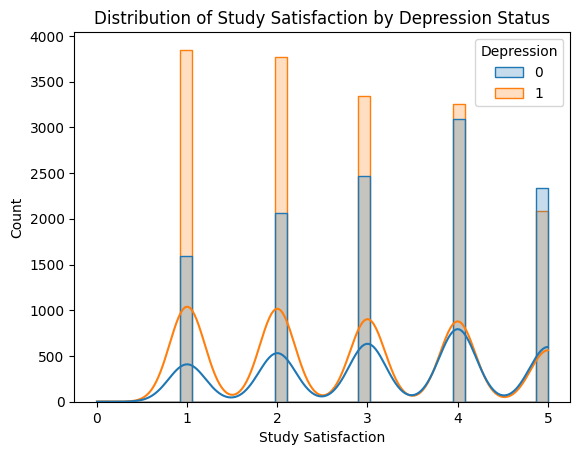

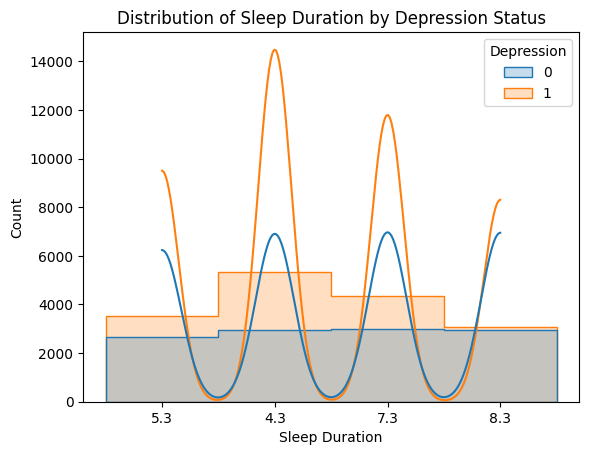

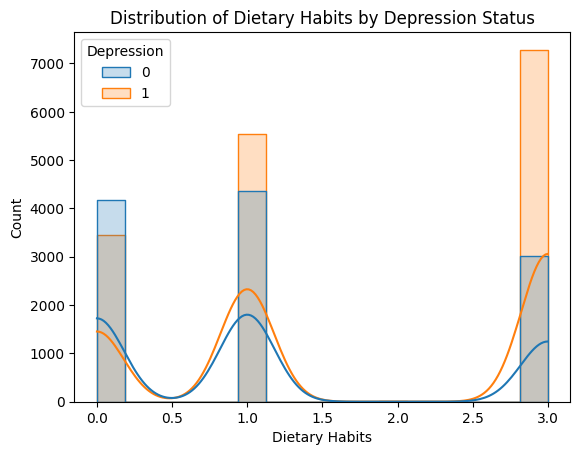

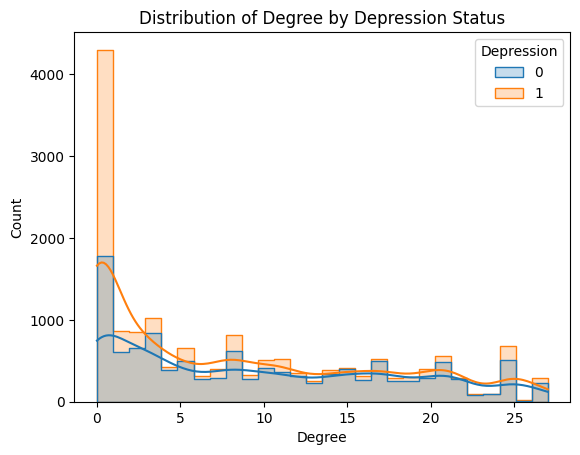

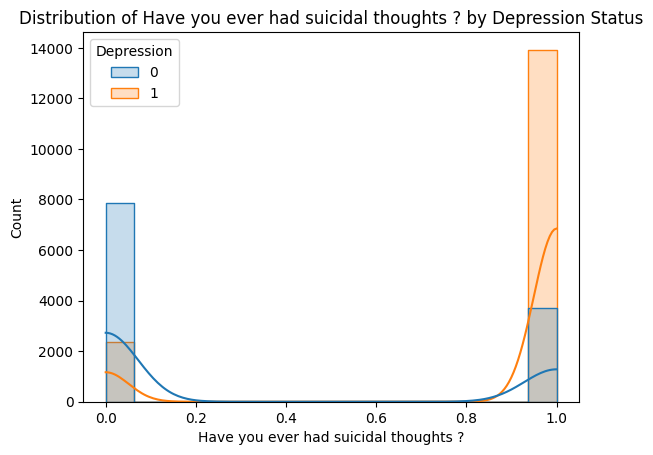

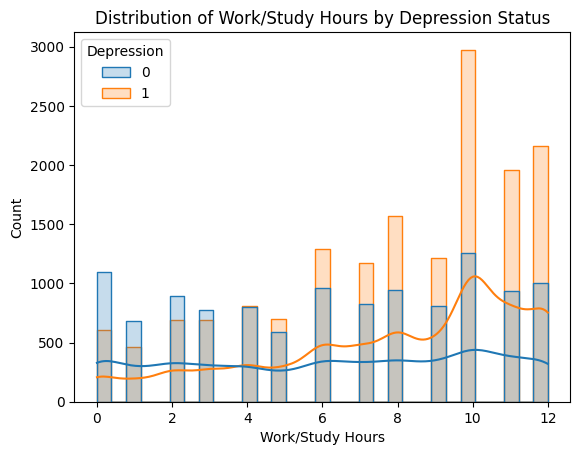

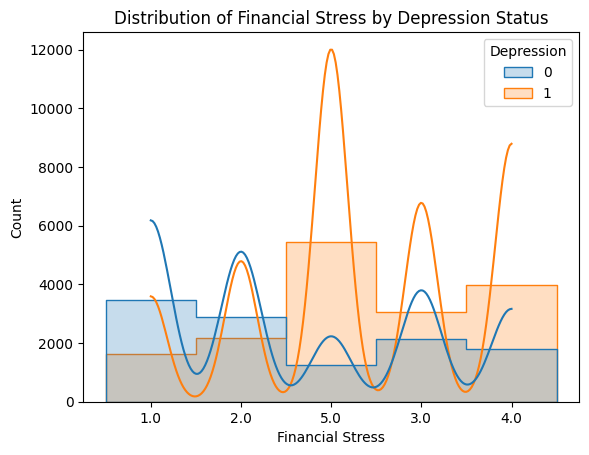

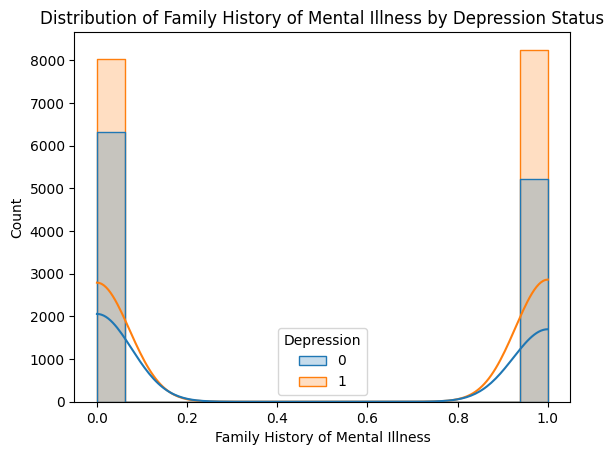

In [ ]:
#EDA
import seaborn as sns
for col in x.columns:
    plt.figure() # Create a new figure for each plot
    sns.histplot(data=df, x=col, hue="Depression", kde=True, element="step")
    plt.title(f'Distribution of {col} by Depression Status')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
#Logistic Reg ===> 0/1 : dep/not dep

from sklearn.linear_model import LogisticRegression
model=LogisticRegression(penalty='l2',solver='liblinear', tol=0.0001, C=0.4, fit_intercept=True,l1_ratio=0.7)
model.fit(x_train, y_train)
model.coef_

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


array([[ 3.31123937e-02, -1.13562776e-01, -2.20984116e-03,
         8.20753905e-01,  4.74326927e-02, -2.57132244e-01,
        -1.21255542e-01,  3.42341173e-01,  2.05145215e-03,
         2.48972275e+00,  1.13360706e-01,  5.45288759e-01,
         2.60731760e-01]])

Accuracy: 0.8506283662477558
Precision: 0.8603468899521531
Recall: 0.8874151758173967
F1-score: 0.873671424233222


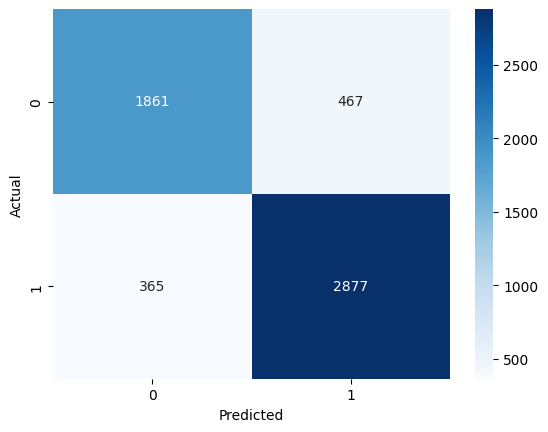

In [ ]:
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
results = pd.DataFrame([
    {"Model": "LogReg (L1)", "Accuracy":  0.850, "F1": 0.873},
    {"Model": "LogReg (L2)", "Accuracy": 0.850, "F1": 0.873},
    {"Model": "LogReg (ElasticNet)", "Accuracy": 0.849, "F1": 0.872}
])
results
#l1_solver=liblinear
#l2_solver=liblinear

,Model,Accuracy,F1
0,LogReg (L1),0.850,0.873
1,LogReg (L2),0.850,0.873
2,LogReg (ElasticNet),0.849,0.872


In [78]:
!git clone https://github.com/AlaaBouhaouel/ML_projects.git


Cloning into 'ML_projects'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 30 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (30/30), 815.94 KiB | 2.76 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [79]:
%cd ML_projects
!mkdir -p classification/student_depression
!mv /content/Student_depression.ipynb classification/student_depression/




/content/ML_projects
mv: cannot stat '/content/Student_depression.ipynb': No such file or directory
